<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Stringpixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stringpixel
Diese Woche möchten wir gerne Strings benutzen, um Bilder anzuzeigen. Die Idee ist, dass wir einfach Unicode-Charaktere in bestimmter Reihenfolge darstellen, sodass Bilder angezeigt werden können.

Eine vollständige Liste der Unicode-Zeichen findet man beispielsweise auf Wikipedia: https://en.wikipedia.org/wiki/List_of_Unicode_characters.

## Schritt 1: Schwarze und weiße Pixel
Zum Anfang möchten wir Bilder darstellen, die nur aus schwarzen und weißen Pixeln bestehen. Ein "Pixel" ist ein "Picture Element", also sozusagen der Grundbaustein eines Bildes. Eine 10-Megapixel-Kamera produziert beispielsweise Bilder mit 10 Millionen Pixeln.

**Achtung**: Am besten stellst du die Darstellung von Colab auf weißen Hintergrund! Andernfalls werden die Bilder "invertiert" dargestellt, das heißt Schwarz ist Weiß und Weiß ist Schwarz. Die Einstellung findet man über "Tools" -> "Einstellungen" -> "Webseite", wo man das "Thema" auf "light" stellen kann.

Für schwarze Pixel benötigen wir ein Zeichen, bei dem *alle* Darstellungspixel auf Schwarz gestellt werden. Das Zeichen hat den Unicode-Wert ```2588```. Wie können wir am einfachsten ein weißes Pixel darstellen?

*Anmerkung*: Unicode-Werte sind immer in Hexadezimaldarstellung, es gibt also die Ziffern 0 bis 9 und A bis F. Die größte vierstellige Hexadezimalzahl lautet "FFFF".

### Aufgabe:
"Zeichne" ein Schachbrett, einen Kreis, das Haus des Nikolaus und ein paar Buchstaben deiner Wahl! 

*Hinweis*: Einen Zeilenumbruch bekommst du mit dem String ```\n```.

*Bonus*: Zeichne ein Labyrinth auf ein karriertes Blatt und übertrage es in ein Stringbild.

In [7]:
schwarz = "\u2588"
weiß = "?"
zeilenumbruch = "\n"

print(schwarz+weiß+schwarz+weiß+zeilenumbruch+schwarz+weiß+schwarz+weiß)

█?█?
█?█?


## Schritt 2: Grauwerte
"Zwischen" Schwarz und Weiß sind noch unterschiedliche Grauwerte möglich. Auch die Zwischenwerte finden wir bei Wikipedia: https://de.wikipedia.org/wiki/Unicodeblock_Blockelemente.

### Aufgabe:
Welche Blockelemente werden für die Grauwerte benötigt? Implementiere ein Bild mit Farbgradienten (also auf- oder absteigend in der Helligkeit) von Schwarz zu Weiß. Das Bild soll 10 "Pixel" hoch und 20 "Pixel" breit sein.

In [ ]:
# Hier kommt dein Code rein




Diese Grauwerte können nun beispielsweise für Schattierungen oder Hintergrundelemente verwendet werden.

### Aufgabe:
"Zeichne" den Buchstaben ```F``` mit Schattierungen. "Zeichne" danach eine Skyline einer Stadt mit Hochhäusern, die im leichten Nebel liegt. Das bedeutet, dass Häuser im Vordergrund schwarz und im Hintergrund grau sind. In den schwarzen Hochhäusern könnten vielleicht sogar Fenster zu sehen sein.

In [ ]:
# Hier kommt dein Code rein




## Echte Bilder in Stringpixel umwandeln
Unten sind bereits ein paar Bilder zur Auswahl vorgegeben, sowie unterschiedliche Bildverarbeitungsmethoden, um sie zu verarbeiten. Suche dir aus dem Internet irgendwelche Bilder und lasse sie von dem Algorithmus "zeichnen"!

(15, 15)
(514, 400, 1)


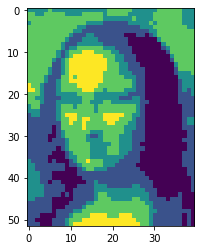

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# --- Hier kannst du den Link einfügen -----------------------------------------
#link = "https://static.dw.com/image/45665028_605.jpg"
link = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Mona_Lisa_detail_face.jpg/800px-Mona_Lisa_detail_face.jpg"
#link = "https://www.mathe-sh.de/wp-content/uploads/2021/03/cropped-Mathe_SH_logo.png"

# ------------------------------------------------------------------------------

def pad_dat_boi(img, n=10):
    h, w, c = img.shape
    padded = np.zeros((h+2*n,w+2*n, c))
    padded[n:h+n, n:w+n] = img
    padded[:n,n:w+n] = img[:n][::-1]
    padded[h+n:,n:w+n] = img[h-n:][::-1]
    padded[:,:n] = padded[:,2*n:n:-1]
    padded[:,n+w-1:] = padded[:,n+w-1:w-2:-1]
    return padded

def conv(img, kernel, stride=1):
    h, w, c = img.shape
    print(img.shape)
    k = kernel.shape[0]
    img_padded = pad_dat_boi(img, n=int(k/2))
    out = np.zeros((h//stride, w//stride))

    #for cc in range(c):
    for xx in range(0, k):
        for yy in range(0, k):
            out += kernel[xx,yy]*img_padded[xx:h+xx, yy:w+yy].squeeze()
    return out

img = (io.imread(link)@np.array([0.299, 0.587, 0.114]))#[::10, ::10]#.astype(np.float32)#[::2,::2]
while np.max(img.shape)>1024:
    img = img[::2, ::2]
img = img[:,:,None]
base = np.linspace(-2,2,num=25)
kernel = np.exp(-base**2)[:,None]*np.exp(-base**2)
kernel = np.ones([15,15])
kernel /= np.sum(np.abs(kernel))
print(kernel.shape)
img = conv(img, kernel, stride=1)

img -= np.min(img)
img /= np.max(img)
img = img[::10, ::10]
img *= 4
img = np.round(img).astype(np.uint8)
plt.figure()
plt.imshow(img)
plt.show()

zeichen = [2*"\u2588", 2*"\u2593", 2*"\u2592", 2*"\u2591", 2*" "]
text = ""
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        text += zeichen[img[i,j]]
    text += "\n"

In [4]:
with open("elefant.txt", "w") as file:
    file.write(text)
print(text)

▒▒▒▒▒▒▒▒▒▒░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░▒▒▒▒▒▒
░░░░▒▒▒▒░░░░░░░░░░▒▒▒▒▒▒▒▒░░░░░░░░░░▒▒░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░▒▒▒▒▒▒
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░▒▒▒▒▒▒
▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒░░▒▒░░░░░░░░░░░░▒▒▒▒▒▒
░░░░░░░░░░░░░░░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░░░░░░░░░░░▒▒▒▒
░░░░░░░░░░░░░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░▒▒▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓██████▓▓▓▓██▓▓▒▒░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░▒▒▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓██████████████▒▒░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░▒▒▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓████████████████▒▒░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░▒▒▓▓▒▒▒▒░░░░░░░░░░░░▒▒▒▒▒▒▓▓▓▓▓▓▓▓██████████████▓▓▒▒░░░░░░░░░░░░
░░░░░░░░░░░░░░▒▒▓▓▒▒░░░░░░      ░░░░░░░░▒▒▒▒▓▓▓▓▓▓████████████████▓▓░░░░░░░░░░░░
░░░░░░░░░░░░░░▒▒▓▓▒▒░░              ░░░░░░▒▒▒▒▓▓▓▓▓▓████████████████▒▒░░░░░░░░░░
░░░░░░░░░░░░▒▒▓▓▒▒░░        